 # How Crude Oil and Candaian Dollar are Correlated 

__Abstract__ 

Throughout analysis we reached out for the following results:

The Crude Oil and Candaian dollar are correlated 
The rate of correlation is strong enough to prove the relation 
Both settlement volume spike in June each year

In our analysis we were able to quantify the fundamental  relationship between Crude oil and Canadian dollar.

 Introduction 

The exchange rate  between Canada and the U.S. has been strongly correlated to the price of oil in recent years. Over the long run, when the price of oil rises, the value of the Canadian dollar (also called the loonie) also usually rises relative to that of the U.S. dollar. 
That correlation can be directly attributed to the way Canada earns most of its U.S. dollars – from the sale of crude oil – and the percentage of Canada's revenue that this constitutes. 
The main initiative in this project is try to prove this relationship and quantify the correlation between Crude oil and Canadian Dollar


__Data Wrangling Section:__


The Data we  chose for this project is  a Time series Data from  Quandl.com.
We  imported the Data sets  from Quandl.com using the API provided for crude oil and CAD.
The crude oil API is Crude_Oil and that of CAD is CAD


In [2]:
#First step is to import the Libraries we will need to use 
import pandas as pd
from datetime import datetime  
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()
np.random.seed(42)
plt.rcParams['figure.figsize']=[15,5]



In [4]:
#Now open the crude oil as csv file from the provided API and save it to df as pandas data frame 
df = pd.read_csv("https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL17.csv?api_key=H32H8imfVNVm9fcEX6kB",parse_dates=['Date'])

In [5]:
#sorting data by date 
df=df.sort_values('Date')

In [6]:
df=df.set_index('Date')

In [7]:
# first step is to print the top 5 rows of the Data and the last five rows to check the Data 
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1983-03-30,28.90,28.95,28.70,28.95,NaN,28.95,18.0,14.0
1983-03-31,28.75,28.75,28.75,28.75,NaN,28.75,3.0,13.0
1983-04-04,28.95,28.95,28.95,28.95,NaN,28.95,0.0,13.0
1983-04-05,29.00,29.10,29.00,29.10,NaN,29.10,5.0,18.0
1983-04-06,29.10,29.20,29.10,29.20,NaN,29.20,5.0,19.0


In [8]:
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-07-03,53.95,54.96,53.52,54.92,1.30,54.89,20481.0,145084.0
2019-07-05,54.97,55.19,54.03,55.08,0.07,54.82,13509.0,147207.0
2019-07-08,54.97,55.58,54.75,54.96,0.22,55.04,11226.0,147584.0
2019-07-09,54.90,55.90,54.78,55.55,0.30,55.34,20841.0,148473.0
2019-07-10,55.63,57.13,55.63,56.70,1.73,57.07,34221.0,148388.0


we  called the __.info()__ method provides important information about a DataFrame, such as the number of rows, number of columns,number of non-missing values in each column, and the data type stored in each column


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9114 entries, 1983-03-30 to 2019-07-10
Data columns (total 8 columns):
Open                          8643 non-null float64
High                          8808 non-null float64
Low                           8844 non-null float64
Last                          8964 non-null float64
Change                        1346 non-null float64
Settle                        9114 non-null float64
Volume                        9114 non-null float64
Previous Day Open Interest    9114 non-null float64
dtypes: float64(8)
memory usage: 640.8 KB


Since the Data is a numeric data we would ran a  statistical analysis to check for outliers in case of any 
__df.describe()__
as the following Table shows that Volume raises a question mark about the outliers and also Settle ,Last ,low,High and Open  but visualizing the data shows that the outliers are fact based and not bad data or errors in our Data frame but actual Data
the price level of the crude oil and the trading volume levels are actual values so the outliers are accurate  historical Data

In [10]:
df.describe()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,8643.000000,8808.000000,8844.000000,8964.000000,1346.000000,9114.000000,9114.000000,9114.000000
mean,41.848664,42.222238,42.051467,42.360749,0.631471,42.551862,1166.671494,12238.237547
std,29.428798,29.270695,29.119047,29.038656,0.603672,28.843678,4044.944343,25639.776985
min,10.750000,10.850000,10.400000,10.840000,0.010000,10.840000,0.000000,0.000000
25%,19.050000,19.170000,19.120000,19.200000,0.210000,19.260000,6.000000,1990.000000
50%,25.200000,25.550000,25.455000,25.825000,0.460000,26.250000,152.000000,5139.000000
75%,65.390000,64.830000,64.252500,64.130000,0.857500,63.750000,613.000000,11851.500000
max,145.880000,146.860000,143.550000,145.450000,5.930000,145.450000,59716.000000,237239.000000


# Showing the Volume distribution 
This shows that the Volume plot is left skewed with the Data centralized to the right where we have spikes of trading volume in 2008 during the Financial Crisis and Years 2013,2015,2016,2017 and this is due to many reasons


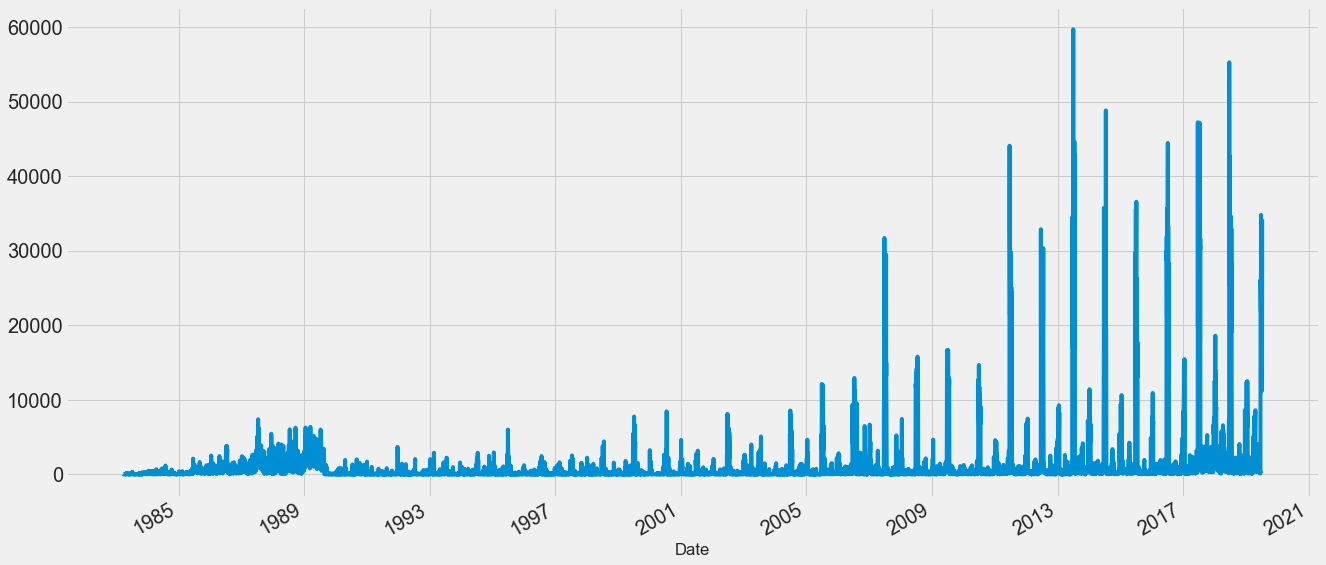

In [11]:
df['Volume'].plot(figsize=(20,10), linewidth=4, fontsize=20)

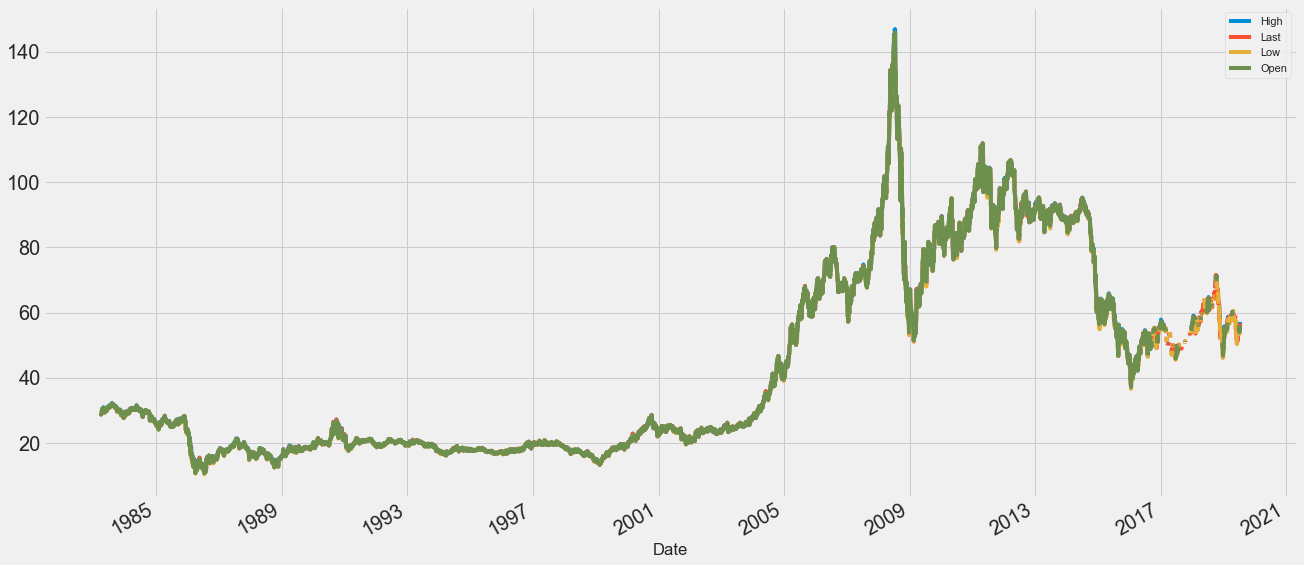

In [12]:
#plotting data on a time series plot
df[['High','Last','Low','Open']].plot(figsize=(20,10),linewidth=4, fontsize=20)
# the data is a time series data wit a trend up and high prices flactuations in the period 2008-2017 

Now we have to clean the data our data has a lot of NAN values.there is more than an approach to deal with NAN, one of them is to drop NAN values but since the number of the remaining solid rows of Data is few compared to the original Data so dropping the NaN does not make sense as taking this avenue would affect the analysis. So we should deal with the missing values in a different manner like filling the missing Data.The type of our Data suggest that we should follow a certain approach in dealing with filling Data.First we have to fill the NaN values in the following columns High,Open,Low and Last applying the forward Method Since the Data has outliers and applying the mean approach would affect the analysis. for example The mean is $42 per barrel as statistic table shows and some of the NaN values is at the prices level of 80 to 100 dollars per barrel so it is of more statistical sense to fill the data with the forward fill method rather than the mean approach As for the Change column missing Data is just the change between the settlement Prices between two consecutive trading days . so we will deal with the Change column later after we finish with the main columns High,Open,Low and Last

The Change is the difference between the settlement prices of two consecutive dates and its value in the data is absolute value so it has no directional sense  and has a lot of missing values so dropping this column and creating a new changes column is the most convenient way. and this is done by creating a __shifted__  column to capture the settlement changes from day to day with a one day forwarded to future using shift method.Then creating a new column and appending this column to the data frame __changes__ to capture the changes in settlement from day to day 
df_new=df.fillna(method='ffill')


In [13]:
df_new=df.fillna(method='ffill')
df_new=df_new.drop(['Change'],axis=1)
df_new['shifted']=df_new.Settle.shift()
df_new['Changes']=df_new['Settle']-df_new['shifted']
df_new.tail()

,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,shifted,Changes
Date,,,,,,,,,
2019-07-03,53.95,54.96,53.52,54.92,54.89,20481.0,145084.0,53.59,1.30
2019-07-05,54.97,55.19,54.03,55.08,54.82,13509.0,147207.0,54.89,-0.07
2019-07-08,54.97,55.58,54.75,54.96,55.04,11226.0,147584.0,54.82,0.22
2019-07-09,54.90,55.90,54.78,55.55,55.34,20841.0,148473.0,55.04,0.30
2019-07-10,55.63,57.13,55.63,56.70,57.07,34221.0,148388.0,55.34,1.73


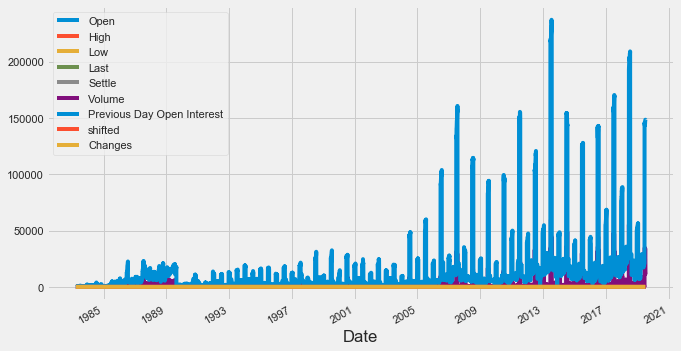

In [14]:
#Storytelling 
# first let us plot the Data to visualize any patern in our data set
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
df_new.plot()
#since the volume is way to high compared to the price of the commodity let us plot the price and volume each on a plot

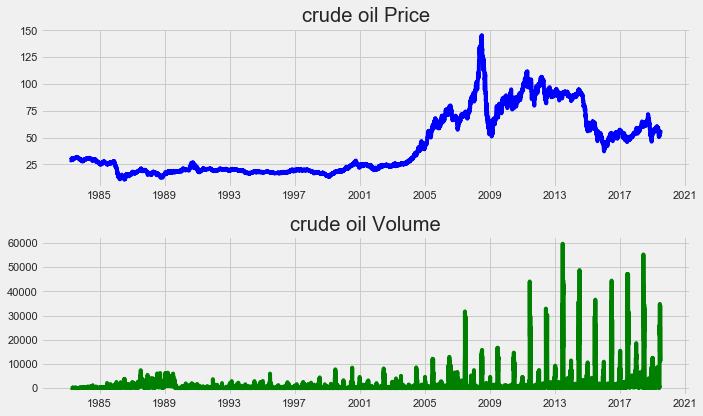

In [15]:

# create a  first sub dataset with  the settle price and a second sub dataset with the volume and plot both sub dataset
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
plt.subplot(2,1,1)
plt.title('crude oil Price')
plt.plot(df_new['Settle'],color='blue')
plt.subplot(2,1,2)
plt.title('crude oil Volume')
plt.plot(df_new['Volume'],color='green')
plt.tight_layout()
plt.show()


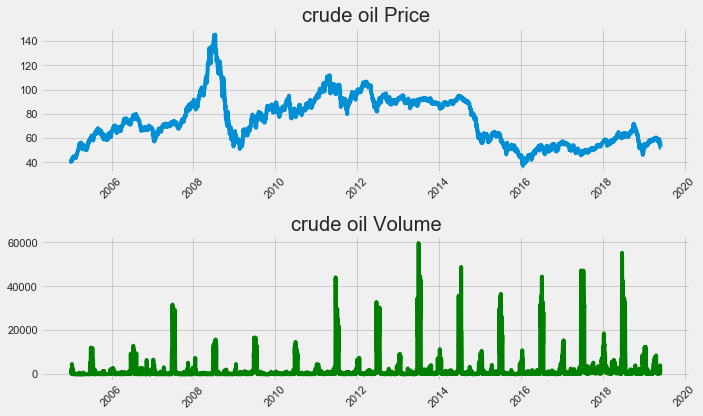

In [16]:
# the data shows up trend vs time but also we can see a very volatile market by volume especially starting 2005 when the price 
# started to go up breaking new height  so let us copmare prices decling to volume volatility 
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
df_settle=df_new['Settle']
df_volume=df_new['Volume']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('crude oil Price')
plt.plot(df_settle['2005-01-01':'2019-06-03'])
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('crude oil Volume')
plt.plot(df_volume['2005-01-01':'2019-06-03'],color='green',)
plt.tight_layout()
plt.show() 
# A closer look at the plots shows that the volume has a seasonal pattern where it jumps in july each year with one diffrence 
# which is the trading volume from year to year 

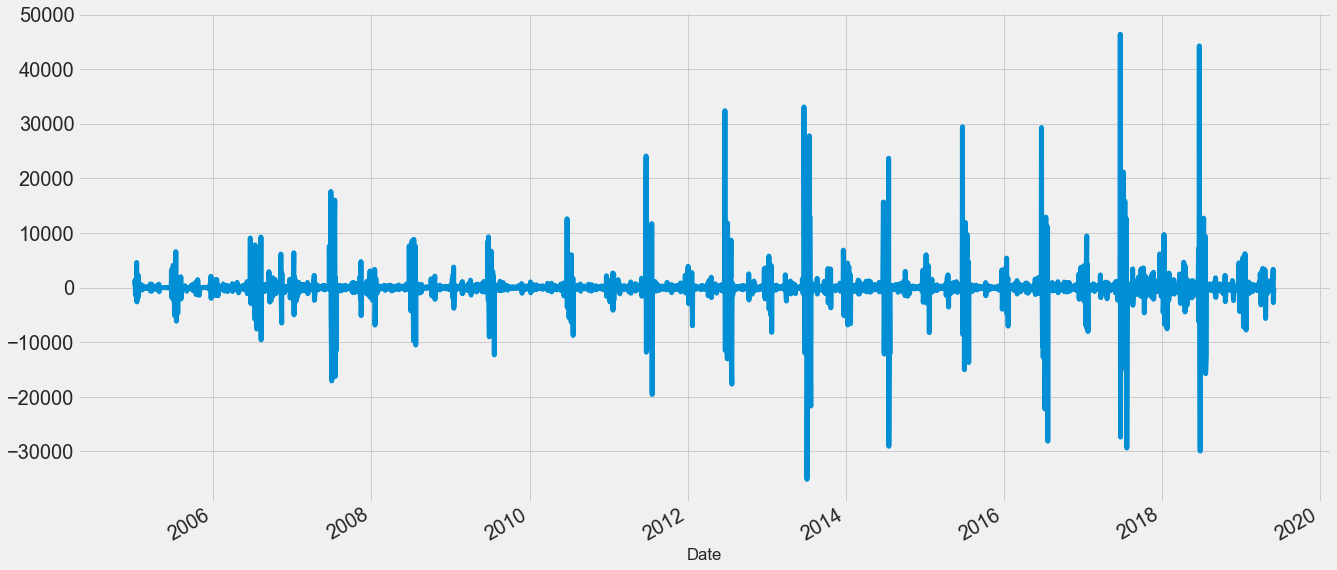

In [17]:
# let us focus on the volume chart to clarify in case we have seasonality on data
# To detect seasonality let us remove any trend in the data thus by applyinhg the diff() method and then ploting firdt order diff
df_volume['2005-01-01':'2019-05-31'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)


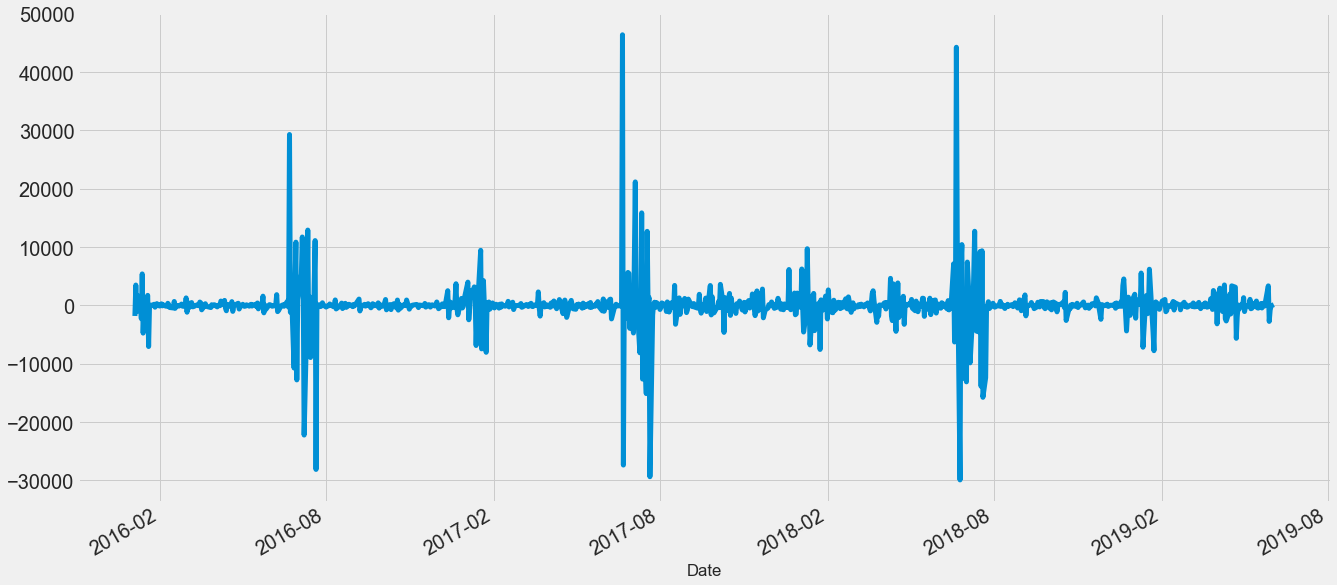

In [18]:
#drilling down more to find in which month this spike occurs 
df_volume['2016-01-01':'2019-06-03'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
#it is clearly happening in julyeach year but more aggresivley after 2012
# the below plot show seasonality in trading volume of oil each year in july 

What drives the volume of crude oil to the highs especially in july of each year?
It is the consumption of Oil in US AND Canada due to summer and people would travel alot
also what is driving the volume in January and february is the oil needed for heat?
so future conracts and options on oil are setteled in July and February and this what cuases the volume to a high spikes 

In [19]:
# as for the settelment price for oil as the time plot shows that the maximum settelement price is 145.5 
df_new['Settle']['2008-01-01':'2019-05-31'].max()


145.45

In [20]:
# as for the settelment price for oil as the time plot shows that the minimum settelement price is 37.22
df_new['Settle']['2008-01-01':'2019-05-31'].min()

                

37.22

In [21]:
# Importing the Cad dollar data set
df_cad = pd.read_csv("https://www.quandl.com/api/v3/datasets/CHRIS/CME_CD4.csv?api_key=H32H8imfVNVm9fcEX6kB",parse_dates=['Date'])

In [22]:
# setting the index as date 
df_cad=df_cad.set_index('Date')


In [23]:
#sorting data by date 
df_cad=df_cad.sort_values('Date')


In [24]:
df_cad.head()


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1977-03-11,0.93,0.931,0.93,0.93,NaN,0.93,1.0,1.0
1977-03-14,0.93,0.930,0.93,0.93,NaN,0.93,0.0,1.0
1977-03-15,0.93,0.930,0.93,0.93,NaN,0.93,0.0,1.0
1977-03-16,0.93,0.930,0.93,0.93,NaN,0.93,0.0,1.0
1977-03-17,0.93,0.930,0.93,0.93,NaN,0.93,0.0,1.0


In [25]:
# since the Data is a numeric data we would ran a  statistical analysis to check for outliers in case of any 
df_cad.describe()
# as the following Table shows that Volume raises a question mark about the outliers 
# but visualizing the data shows that the outliers are fact based and not bad data or errors in our Data frame but actual Data
# the price level of the candian dollar  and the trading volume levels are actual values so the outliers are accurate historical Data

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,9924.000000,10078.000000,10068.000000,10118.000000,1346.000000,10142.000000,10142.000000,10142.000000
mean,0.804142,0.804385,0.802945,0.803488,0.002894,0.803392,19.119799,473.638533
std,0.099401,0.098838,0.098663,0.098544,0.002410,0.098449,56.797264,461.761970
min,0.619500,0.619700,0.618300,0.618300,0.000050,0.618300,0.000000,0.000000
25%,0.732400,0.733500,0.732500,0.733300,0.001000,0.733325,0.000000,147.000000
50%,0.798600,0.797875,0.795950,0.796200,0.002275,0.795500,4.000000,340.000000
75%,0.862000,0.862000,0.860725,0.861000,0.004200,0.860900,17.000000,656.000000
max,1.087700,1.087700,1.083300,1.083300,0.016100,1.083300,1822.000000,4082.000000


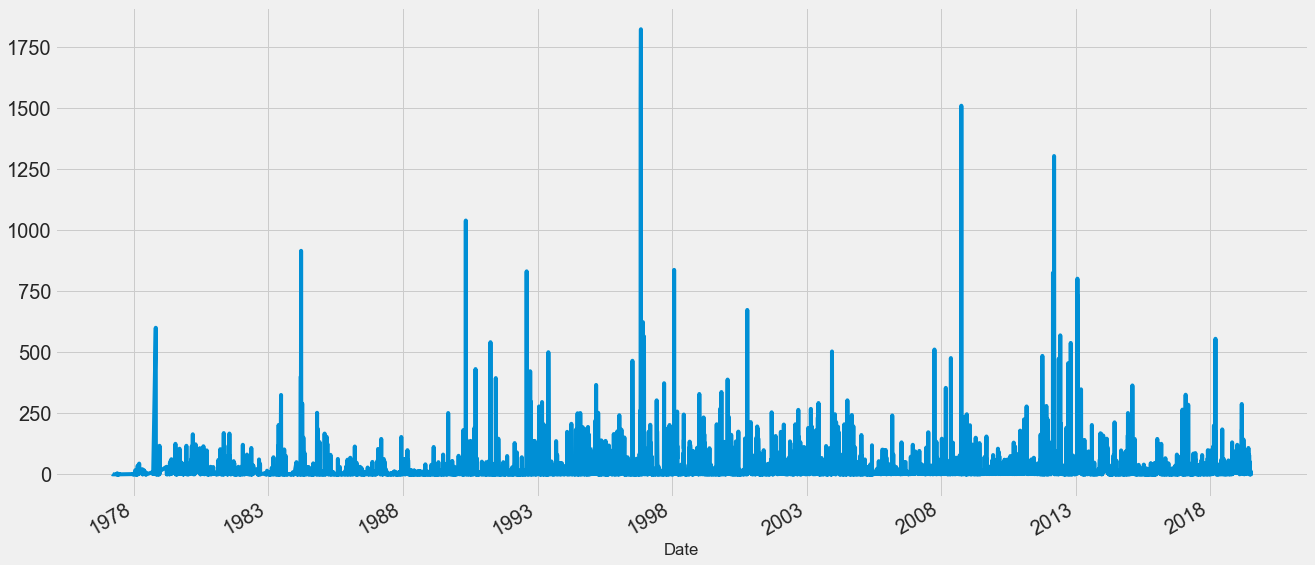

In [26]:
# Showing the Volume distribution 
df_cad['Volume'].plot(figsize=(20,10), linewidth=4, fontsize=20)
# This shows that the Volume plot shows  we have spikes of trading volume starting the years  1980,1985,1998,2001,2005
# 2013,2015,2016,2017 and this is due to many reasons

In [27]:
df_cadnew=df_cad.fillna(method='ffill')
df_cadnew=df_cadnew.drop(['Change'],axis=1)
df_cadnew['shifted']=df_cadnew.Settle.shift()
df_cadnew['Changes']=df_cadnew['Settle']-df_cadnew['shifted']
df_cadnew.tail()

,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,shifted,Changes
Date,,,,,,,,,
2019-07-03,0.763,0.763,0.7651,0.7651,0.76760,0.0,216.0,0.76535,0.00225
2019-07-05,0.763,0.763,0.7651,0.7651,0.76715,13.0,216.0,0.76760,-0.00045
2019-07-08,0.763,0.763,0.7651,0.7651,0.76630,0.0,214.0,0.76715,-0.00085
2019-07-09,0.763,0.763,0.7651,0.7651,0.76455,0.0,214.0,0.76630,-0.00175
2019-07-10,0.763,0.763,0.7651,0.7651,0.76750,1.0,214.0,0.76455,0.00295


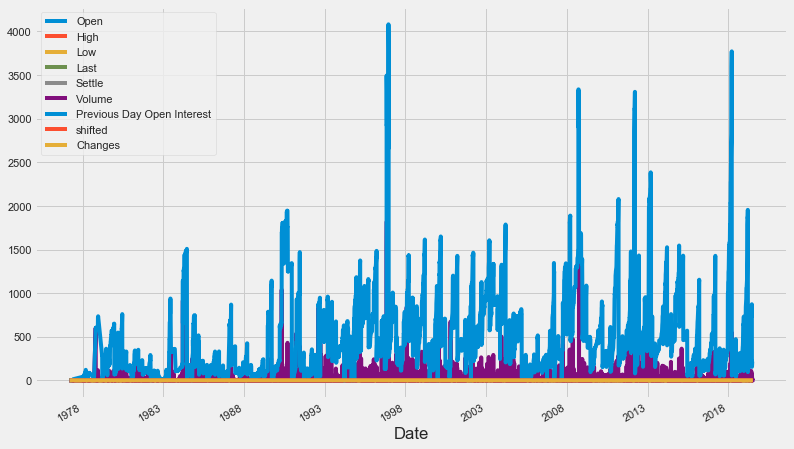

In [28]:
#Storytelling 
# first let us plot the Data to visualize any patern in our data set
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')
df_cadnew.plot()
#since the volume is way to high compared to the price of the commodity let us plot the price and volume each on a plot

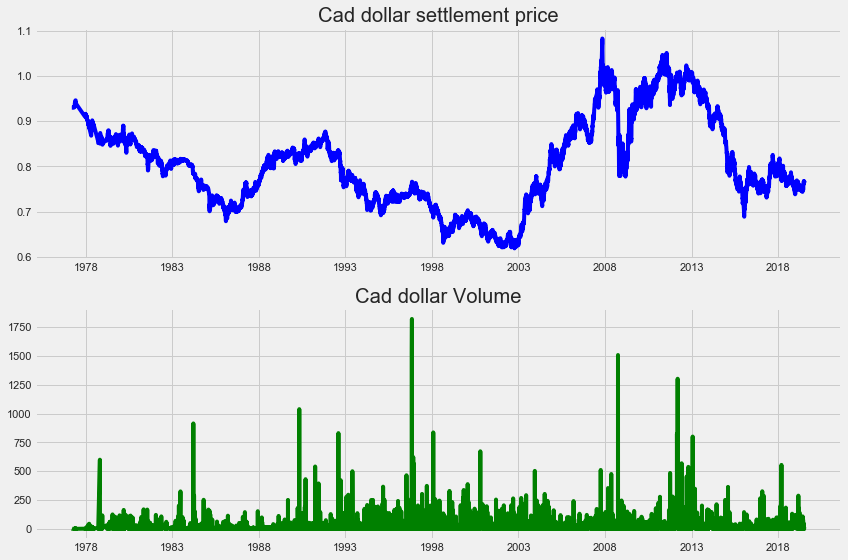

In [29]:
 # create a  first sub dataset with  the settle price and a second sub dataset with the volume and plot both sub dataset
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')
plt.subplot(2,1,1)
plt.title('Cad dollar settlement price')
plt.plot(df_cadnew['Settle'],color='blue')
plt.subplot(2,1,2)
plt.title('Cad dollar Volume')
plt.plot(df_cadnew['Volume'],color='green')
plt.tight_layout()
plt.show()

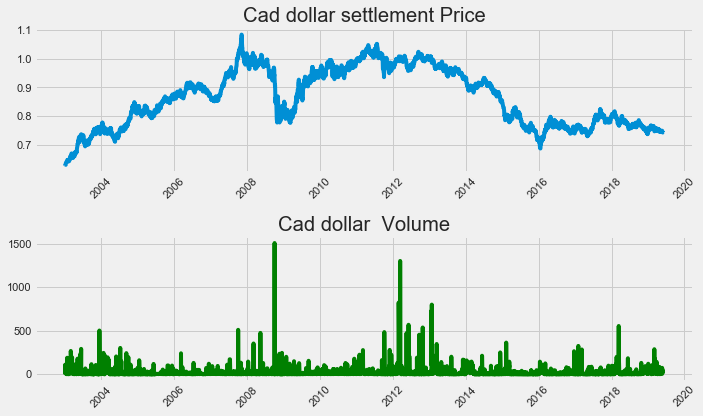

In [30]:
#What trends the time plot is showing us?
# the data shows two trends  first trend is down trend  starting 1978 til 2003
#and second one is uptrend  since 2003.Also we can see a very volatile market by volume
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight') 
df_cadsettle=df_cadnew['Settle']
df_cadvolume=df_cadnew['Volume']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Cad dollar settlement Price')
plt.plot(df_cadsettle['2003-01-01':'2019-05-31'])
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('Cad dollar  Volume')
plt.plot(df_cadvolume['2003-01-01':'2019-05-31'],color='green')
plt.tight_layout()
plt.show() 
# A closer look at the plots shows that the volume has a two big spikes between 2008 - 2010 and 2011 - 2013

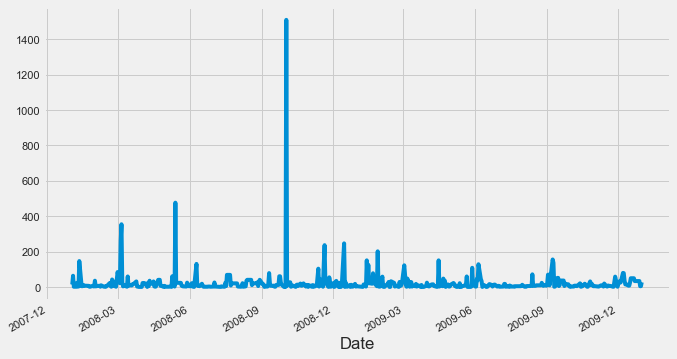

In [31]:
# investigating the seasonal trend of the volume 
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
df_cadvolume['2008':'2009'].plot()

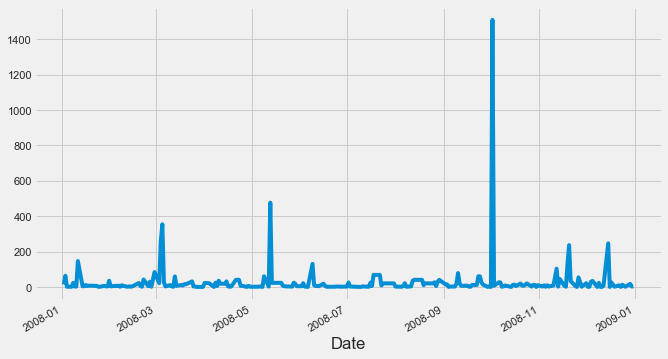

In [32]:
#closer look 
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
df_cadvolume['2008'].plot()

In [33]:
# The maximum volume was recorded in october 2008 was 1822 
df_cadvolume.max()

1822.0

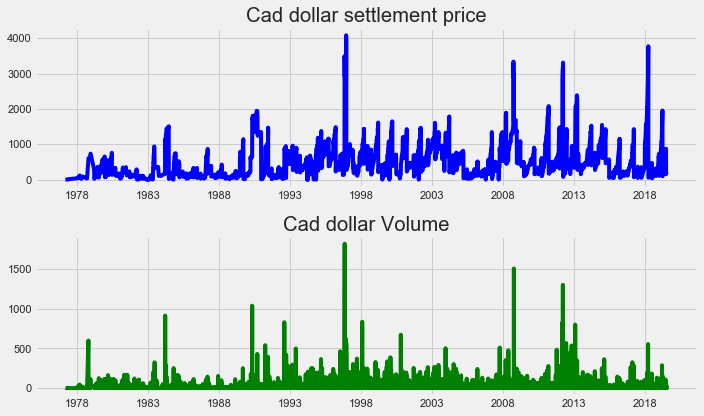

In [34]:
# what is the relation between the Opend Interest positions and Volume?
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
plt.subplot(2,1,1)
plt.title('Cad dollar settlement price')
plt.plot(df_cadnew['Previous Day Open Interest'],color='blue')
plt.subplot(2,1,2)
plt.title('Cad dollar Volume')
plt.plot(df_cadnew['Volume'],color='green')
plt.tight_layout()
plt.show()
# the following plots suggests a releationship between volume traded and Previous day open interest or in other words the yeild 
#payed to hold the currency. Which proves that Candian Dollar is a carry trade currency 

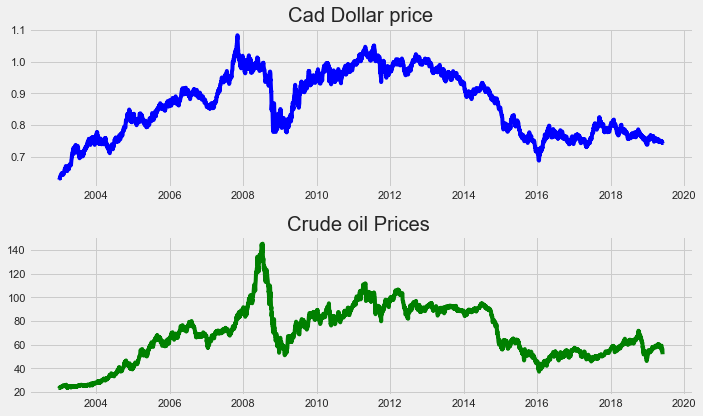

In [35]:
# what is the releation between the Cad and Crude oi?(settle prices)
# Now let us compare the Crude oil and the Canadian dollar prices movements to investigate any releationship starting 2003
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
plt.subplot(2,1,1)
plt.title('Cad Dollar price')
plt.plot(df_cadnew['Settle']['2003-01-01':'2019-05-31'],color='blue')
plt.subplot(2,1,2)
plt.title('Crude oil Prices ')
plt.plot(df_new['Settle']['2003-01-01':'2019-05-31'],color='green')
plt.tight_layout()
plt.show()
#The two data sets seems to be correlated follwoing the same trend.

In [36]:
# Since the two plots shows a releation ship let us investigate this by trying to figure the correlation betwwen both of them.
df_new['Settle'].corr(df_cadnew['Settle'])
# this pearson correlation shows that both data sets are highly correlated  
#indicate a strong positive  linear relationship via a firm linear rule between the settle price of crude oil and Cad dollar

0.815514430683398

In [37]:
#creating cad_settle
cad_settle=df_cadnew['Settle']['2003-01-01':'2019-05-31']
cad_settle.head()


Date
2003-01-02    0.6285
2003-01-03    0.6304
2003-01-06    0.6326
2003-01-07    0.6320
2003-01-08    0.6320
Name: Settle, dtype: float64

In [38]:
#creating oil_settle
oil_settle=df_new['Settle']['2003-02-07':'2019-05-31']
oil_settle.head()

Date
2003-02-07    25.43
2003-02-10    25.04
2003-02-11    25.26
2003-02-12    25.32
2003-02-13    25.53
Name: Settle, dtype: float64

In [39]:
print(cad_settle.corr(oil_settle))

0.8995654366842627


In [40]:
#Normalizig the two data sets since the ranges are  different 
#x_array = np.array(df['total_bedrooms'])
#normalized_X = preprocessing.normalize([x_array])
x_array=np.array(cad_settle)
y_array=np.array(oil_settle)
normalized_X=preprocessing.normalize([x_array])
normalized_Y=preprocessing.normalize([y_array])

In [41]:
df_cadnew[['Settle']]['2003-01-01':'2019-05-31'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4106 entries, 2003-01-02 to 2019-05-31
Data columns (total 1 columns):
Settle    4106 non-null float64
dtypes: float64(1)
memory usage: 64.2 KB


In [42]:
df_new[['Settle']]['2003-02-07':'2019-05-31'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4106 entries, 2003-02-07 to 2019-05-31
Data columns (total 1 columns):
Settle    4106 non-null float64
dtypes: float64(1)
memory usage: 64.2 KB


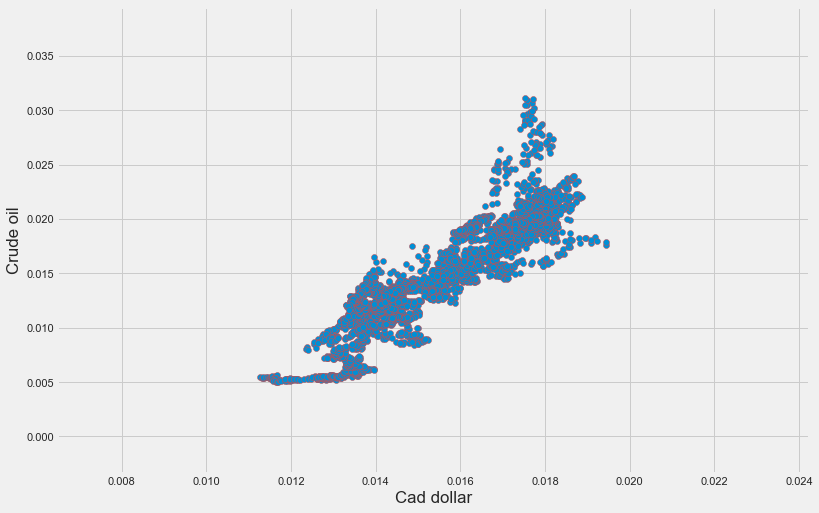

In [43]:

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')
plt.scatter(normalized_X,normalized_Y,edgecolors='r')
plt.xlabel('Cad dollar')
plt.ylabel('Crude oil')
plt.show()
# This plot states the correlation between the Crude oil pprice and the Cad dollar rate 

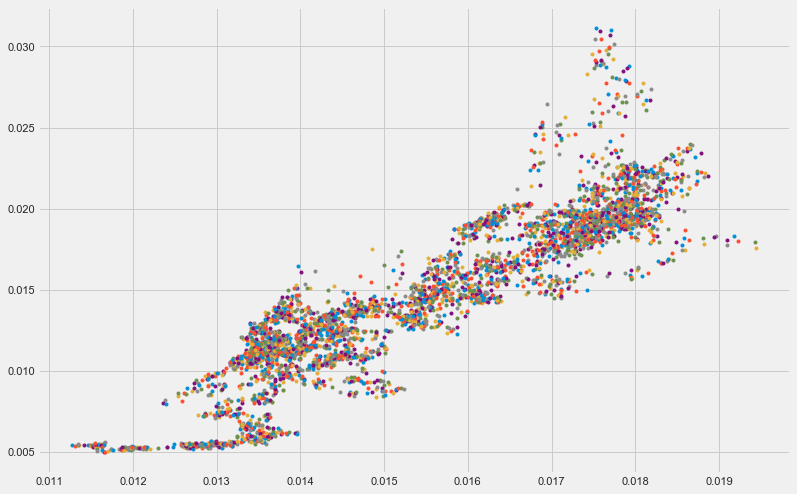

In [96]:
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')
_=plt.plot(normalized_X,normalized_Y,marker='.',linestyle='none')
_=plt.plot(normalized_X,normalized_Y,color='r')
plt.show()

In [44]:
# computint ecdf for one dimensional array of measurments 
def ecdf(data):
    #number of data point = n
    n=len(data)
    x= np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

# Creating a new dataframe with only the Cad dollar and Crude oil settelemnt prices to configre teh correlation between the two dimensions

In [46]:
df_cadnew.rename(columns={'Settle':'Settle'},inplace=True)# renaming the settelment as Cad
df_new.rename(columns={'Settle':'Crude'},inplace=True)# renaming the Settlement of crude as crude

In [47]:
df_crd=pd.concat([df_cadnew['Settle'],df_new['Crude']],axis=1)
df_crd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10244 entries, 1977-03-11 to 2019-07-10
Data columns (total 2 columns):
Settle    10142 non-null float64
Crude     9114 non-null float64
dtypes: float64(2)
memory usage: 240.1 KB


In [48]:
df_crd.tail()

,Settle,Crude
Date,,
2019-07-03,0.76760,54.89
2019-07-05,0.76715,54.82
2019-07-08,0.76630,55.04
2019-07-09,0.76455,55.34
2019-07-10,0.76750,57.07


In [49]:
df_crd=df_crd.dropna() # Dropping the NAN from teh created dataframe

In [50]:
df_crd.tail()

,Settle,Crude
Date,,
2019-07-03,0.76760,54.89
2019-07-05,0.76715,54.82
2019-07-08,0.76630,55.04
2019-07-09,0.76455,55.34
2019-07-10,0.76750,57.07


In [51]:
Settle=df_crd.Settle
crude=df_crd.Crude

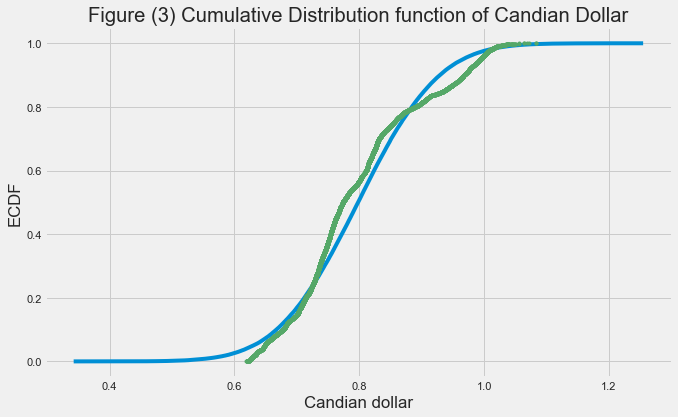

In [52]:
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
# draw samples from a normal distribution of size = 100000
cadnormal=np.random.normal(np.mean(Settle),np.std(Settle),100000)
#Ploting the CDF 
nt_x,nt_y=ecdf(cadnormal)
x,y=ecdf(Settle)
_=plt.plot(nt_x,nt_y)
_=plt.plot(x,y,marker='.',linestyle='none',color='g')
_=plt.xlabel('Candian dollar')
_=plt.ylabel('ECDF')
_=plt.title('Figure (3) Cumulative Distribution function of Candian Dollar')
margins=0.02
_=plt.show()

# The above ecdf shows that the Canadian Dollar Data is almost Normally Distibuted

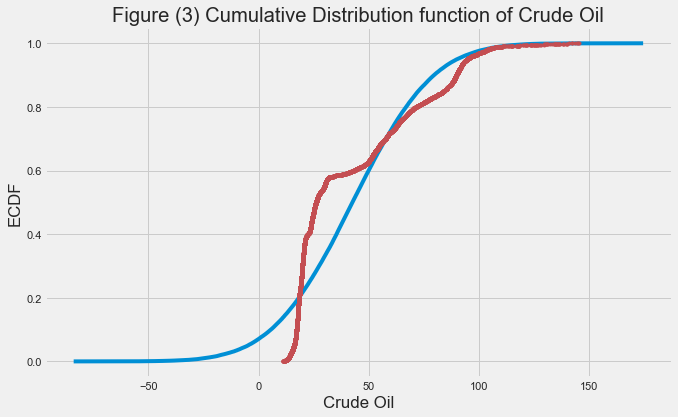

In [53]:
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
# draw samples from a normal distribution of size = 100000
oilnormal=np.random.normal(np.mean(crude),np.std(crude),100000)
#Ploting the CDF 
cr_x,cr_y=ecdf(oilnormal)
x,y=ecdf(crude)
_=plt.plot(cr_x,cr_y)
_=plt.plot(x,y,marker='.',linestyle='none',color='r')
_=plt.xlabel('Crude Oil')
_=plt.ylabel('ECDF')
_=plt.title('Figure (3) Cumulative Distribution function of Crude Oil')
margins=0.02
_=plt.show()

# The above ecdf shows that the Crude Oil Data is not perfectly normally distributed since it is a time series Data

# Let us state a null hypothesis  and an alternative hypothesis and run a Hypothesis testing using Block Bootstrap since the data is a time series data.


# The null Hypothesis is that there is a positive correlation and at least 0.816 between Crude oil and Canadian Dollar. The alternative Hypothesis is that there  is no  correlation of at least 0.816 between Crude oil and Canadian Dollar. 



In [ ]:
df_crd=df_crd.iloc[:9000]

In [56]:
df_crd['block'] = [item for sublist in [[i]* (9000 // 20) for i in range(1, 21)] for item in sublist]

C:\Users\ozeiri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_crd.head()

,Settle,Crude,block
Date,,,
1983-04-07,0.8087,29.45,1
1983-04-08,0.8093,29.90,1
1983-04-11,0.8095,29.80,1
1983-04-12,0.8103,30.40,1
1983-04-13,0.8103,30.45,1


In [58]:
block_nums=list(range(1,20))

In [59]:
bootstrap_block_nums=np.random.choice(block_nums,size=20,replace=True)

In [64]:
df_crd1=pd.concat(df_crd[df_crd.block==i] for i in bootstrap_block_nums)
df_crd1.head()

,Settle,Crude,block
Date,,,
2005-01-19,0.74110,43.40,13
2005-01-20,0.78975,43.15,13
2005-01-21,1.00710,44.01,13
2005-01-24,0.63320,44.27,13
2005-01-25,0.75190,45.04,13


In [62]:
def pearson_r(x,y):
    corr_matrix=np.corrcoef(x,y)
    return corr_matrix[0,1]

In [63]:
import  random as random


perm_replicates=np.empty(10000)

for i in range(10000):
    
    cad_permuted=np.random.permutation(Settle)
    perm_replicates[i]=pearson_r(cad_permuted,crude)
    
p=np.sum(perm_replicates>=pearson_r(Settle,crude))/len(perm_replicates)
print('p-val= ',p)

p-val=  0.6501


The above p-value is the Probability of getting a correlation rate  greater than 0.815 which we conducted in our observation  which means that there is no enough evidence to reject the null hypothesis 